Resolva o exercício 5.10 do Livro-Texto

# Period of an anharmonic oscillator

The simple harmonic oscillator crops up in many places. Its behavior can be studied
readily using analytic methods and it has the important property that its period of oscillation is a constant, independent of its amplitude, making it useful, for instance, for
keeping time in watches and clocks.

Frequently in physics, however, we also come across anharmonic oscillators, whose
period varies with amplitude and whose behavior cannot usually be calculated analytically. A general classical oscillator can be thought of as a particle in a concave potential
well. When disturbed, the particle will rock back and forth in the well:

![image](oscilador_01.png)

The harmonic oscillator corresponds to a quadratic potential $V(x) ∝ x^2$
. Any other form
gives an anharmonic oscillator. (Thus there are many different kinds of anharmonic
oscillator, depending on the exact form of the potential.)
One way to calculate the motion of an oscillator is to write down the equation for
the conservation of energy in the system. If the particle has mass $m$ and position $x$, then
the total energy is equal to the sum of the kinetic and potential energies thus:

$$E = \frac{1}{2} m \left( \frac{dx}{dt}\right)^2 + V(x)$$

Since the energy must be constant over time, this equation is effectively a (nonlinear)
differential equation linking $x$ and $t$.
Let us assume that the potential $V(x)$ is symmetric about $x = 0$ and let us set our
anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at
position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$
and the equation above reads $E = V(a)$, which gives us the total energy of the particle
in terms of the amplitude.


a) When the particle reaches the origin for the first time, it has gone through one
quarter of a period of the oscillator. By rearranging the equation above for $dx/dt$
and then integrating with respect to $t$ from $0$ to $\frac{1}{4}T$
, show that the period $T$ is
given by

$$ T = \sqrt{8m}  \int_{0}^{a} \frac{dx}{\sqrt{V(a) - V(x)}}.$$

Usando como base a equação

$$E = K + U = \frac{1}{2} m v^2 + V(x) = \frac{1}{2} m \left( \frac{dx}{dt}\right)^2 + V(x)$$

Fazemos algumas manipulações algébricas para isolar as dependências de $x$ e $t$.

$$E = \frac{1}{2} m \frac{dx^2}{dt^2} + V(x)$$

$$E - V(x) = \frac{1}{2} m \frac{dx^2}{dt^2}$$

$$\frac{2}{m} (E - V(x)) = \frac{dx^2}{dt^2}$$

$$\frac{2}{m} (E - V(x)) \; dt^2 = dx^2$$

$$ dt^2 = \frac{m}{2} \frac{1}{E - V(x)} \; dx^2$$

$$ dt = \sqrt{\frac{m}{2} \frac{1}{E - V(x)} \; dx^2}$$

$$ dt = \sqrt{\frac{m}{2} \frac{1}{E - V(x)}} \; dx $$

Sabendo que em $t = 0$, $E = V(a)$ e que $t$ varia de $0$ até $\frac{1}{4}T$ e $x$ varia de $0$ até $a$:

$$ \int_{0}^{\frac{1}{4}T} dt = \int_{0}^{a} \sqrt{\frac{m}{2} \frac{1}{V(a) - V(x)}} \; dx $$

$$ \frac{1}{4} T = \int_{0}^{a} \sqrt{\frac{m}{2} \frac{1}{V(a) - V(x)}} \; dx $$

$$ T = \int_{0}^{a} 4 \; \sqrt{\frac{m}{2} \frac{1}{V(a) - V(x)}} \; dx $$

$$ T = \int_{0}^{a} \sqrt{4^2} \; \sqrt{\frac{m}{2} \frac{1}{V(a) - V(x)}} \; dx $$

$$ T = \int_{0}^{a} \sqrt{4^2 \frac{m}{2} \frac{1}{V(a) - V(x)}} \; dx $$

$$ T = \int_{0}^{a} \sqrt{8m  \frac{1}{V(a) - V(x)}} \; dx $$

$$ T = \sqrt{8m}  \int_{0}^{a} \sqrt{\frac{1}{V(a) - V(x)}} \; dx $$

$$ T = \sqrt{8m}  \int_{0}^{a} \frac{1}{\sqrt{V(a) - V(x)}} \; dx $$

b) Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a
Python function that calculates the period of the oscillator for given amplitude a
using Gaussian quadrature with $N = 20$ points, then use your function to make
a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$.

In [1]:
import math
import numpy as np
from gaussxw import gaussxwab
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
w = np.zeros( (2001), float)
x = np.zeros( (2001), float)

def f(x):
    return x ** 4 - 2 * x + 1

def gauss(npts, job, a, b, x, w):
    m = i = j = t = t1 = pp = p1 = p2 = p3 = 0.0

    eps = 3.E-14 # Accuracy

#   m = (npts + 1)/2
    m = (npts + 1)//2
    
    for i in range(1, m + 1):
        t = math.cos(math.pi*(float(i) - 0.25)/(float(npts) + 0.5) )
        t1 = 1
        while( (abs(t - t1) ) >= eps):
            p1 = 1.
            p2 = 0.
            
            for j in range(1, npts + 1):
                p3 = p2
                p2 = p1
                p1 = ((2.*float(j)-1)*t*p2 - (float(j)-1.)*p3)/(float(j))
            pp = npts*(t*p1 - p2)/(t*t - 1.)
            t1 = t; t = t1 - p1/pp
        x[i - 1] = - t; x[npts - i] = t
        w[i - 1] = 2./( (1. - t*t)*pp*pp)
        w[npts - i] = w[i - 1]
    if (job == 0):
        for i in range(0, npts):
            x[i] = x[i]*(b - a)/2. + (b + a)/2.
            w[i] = w[i]*(b - a)/2.
    if (job == 1):
        for i in range(0, npts):
            xi = x[i]
            x[i] = a*b*(1. + xi) / (b + a - (b - a)*xi)
            w[i] = w[i]*2.*a*b*b/( (b + a - (b-a)*xi)*(b + a - (b-a)*xi))
    if (job == 2):
        for i in range(0, npts):
            xi = x[i]
            x[i] = (b*xi + b + a + a) / (1. - xi)
            w[i] = w[i]*2.*(a + b)/( (1. - xi)*(1. - xi) )

def gaussint (no, min, max):
    quadra = 0.
    gauss (no, 0, min, max, x, w)   # Returns pts & wts
#   for n in xrange(0, no):
    for n in range(0, no):
        quadra += f(x[n]) * w[n] # Calculate integral
    return (quadra)


vmin = 0.
vmax = 2.

print("Landau:       ", gaussint(20, vmin, vmax))
print("SciPy padrão: ", integrate.quad(f, vmin, vmax)[0])

Landau:        4.399999999999924
SciPy padrão:  4.3999999999999995


Para $V(x) = x^4$ e $m = 1$, para amplitude $a$ de $0$ até $2$, com $N = 20$.

$$ T = \sqrt{8m}  \int_{0}^{a} \frac{1}{\sqrt{V(a) - V(x)}} \; dx = \sqrt{8 \cdot 1} \int_{0}^{a} \frac{1}{\sqrt{V(a) - V(x)}} \; dx = \sqrt{8}  \int_{0}^{a} \frac{1}{\sqrt{a^4 - x^4}} \; dx$$

In [4]:
def f(x):
    global a
    return (8 ** (1/2)) * 1/((a ** 4 - x ** 4) ** (1/2))

a = 2.
vmin, vmax = (0, a)

print("Landau:       ", gaussint(20, vmin, vmax))
print("SciPy padrão: ", integrate.quad(f, vmin, vmax)[0])

Landau:        1.8240470420215864
SciPy padrão:  1.8540746773016987


In [8]:
A = 2
n = 20
plot_a = [[0.0] for _ in range(n)]
plot_i = [[0.0] for _ in range(n)]
for i in range(1, n+1):
    a = i * A/n
    vmin, vmax = (0, a)
    
    plot_a[i-1] = a
    plot_i[i-1] = gaussint(20, vmin, vmax)

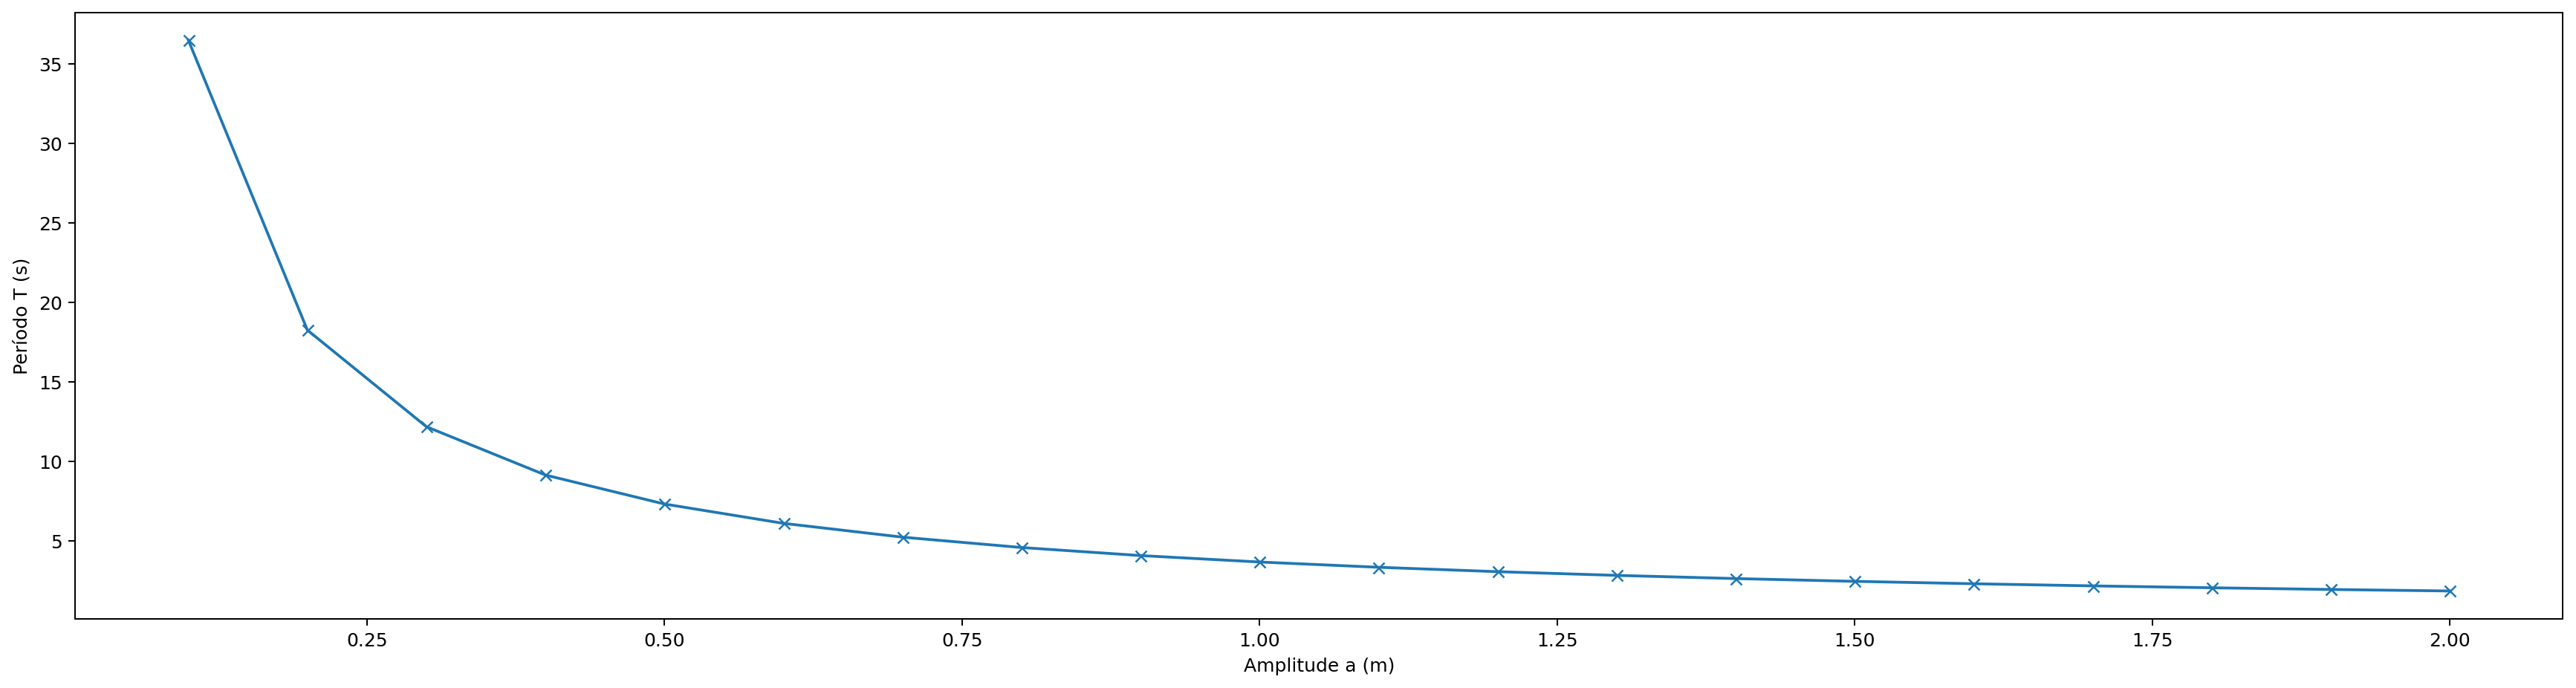

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(24, 6), dpi = 180)
axs.set_xlabel('Amplitude a (m)')
axs.set_ylabel('Período T (s)')
axs.plot(plot_a, plot_i, 'x-')
fig.show()

c) You should find that the oscillator gets faster as the amplitude increases, even
though the particle has further to travel for larger amplitude. And you should
find that the period diverges as the amplitude goes to zero. How do you explain
these results?

Analisando a equação, podemos ver com clareza que quando $a = 0 $, $ T = \sqrt{8}  \int_{0}^{0} \frac{1}{\sqrt{0^4 - x^4}} \; dx$ e isso cria uma situação de divisão por 0, logo a função diverge para amplitude $a = 0 $. Analisando o **problema** proposto, quando não há amplitude não há oscilação, então não faz sentido falar de Período nesta situação.

Como é explicado no enunciado, o potêncial de um Oscilador Harmônico será $V(x) ∝ x^2$, e para um potêncial que seja diferente disso resultará em um Oscilador Anarmônico, e pelo resultado apresentado podemos concluir que para $V(x) = x^4$, quanto maior a amplitude menor será o Período de Oscilação, consequentemente, a velocidade da partícula será maior.

Do mesmo modo, como podemos verificar no gráfico abaixo, para um potêncial $V(x) = x$ o Período irá diminuir conforme aumentamos a amplitude de oscilação.

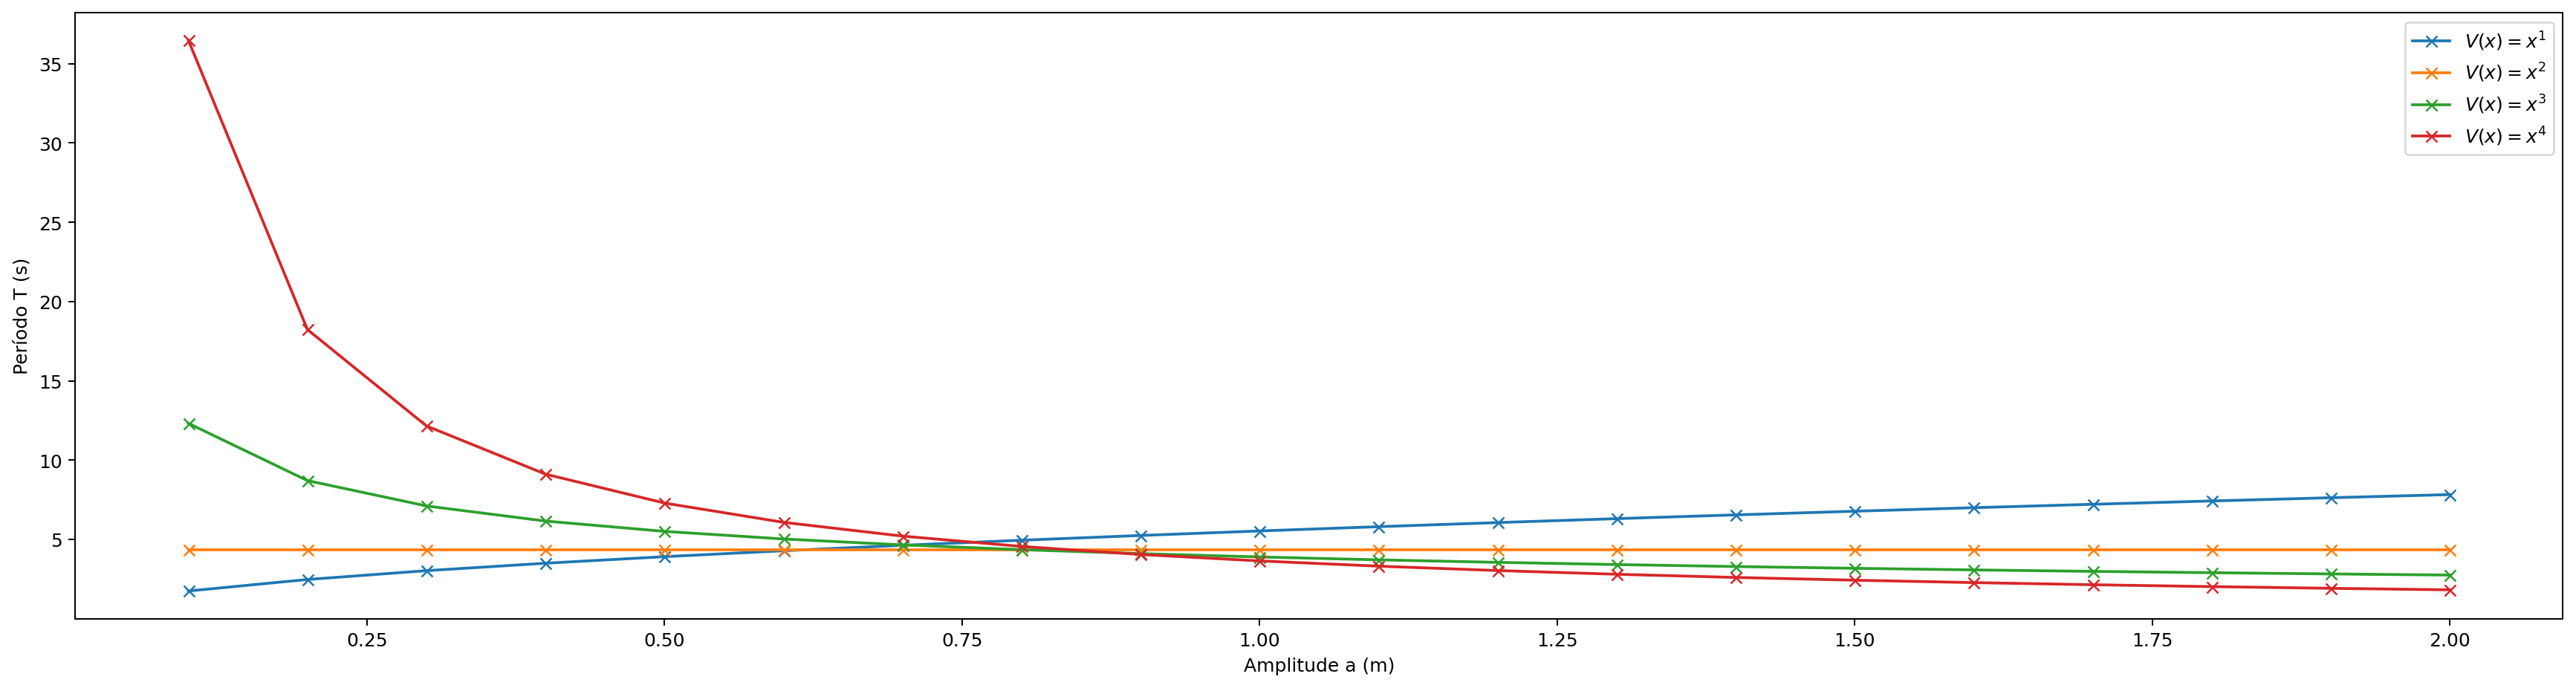

In [9]:
def f(x):
    global a
    global grau
    return (8 ** (1/2)) * 1/((a ** grau - x ** grau) ** (1/2))

fig, axs = plt.subplots(1, 1, figsize=(24, 6), dpi = 180)
axs.set_xlabel('Amplitude a (m)')
axs.set_ylabel('Período T (s)')

A = 2
n = 20
plot_a = [[0.0] for _ in range(n)]
plot_i = [[0.0] for _ in range(n)]

for grau in range(1, 5):
    for i in range(1, n+1):
        a = i * A/n
        vmin, vmax = (0, a)
    
        plot_a[i-1] = a
        plot_i[i-1] = gaussint(20, vmin, vmax)

    axs.plot(plot_a, plot_i, 'x-', label=r"$V(x) = x^"+str(grau)+"$")

axs.legend()
fig.show()